In [31]:
import sqlite3
from django.contrib.auth.hashers import make_password
from django.conf import settings
import pandas as pd
import numpy as np
from faker import Faker
import random
from sqlalchemy import create_engine
import datetime

settings.configure()

In [54]:
connection = sqlite3.connect('db.sqlite3')
cursor = connection.cursor()

In [38]:
cursor.execute('UPDATE SQLITE_SEQUENCE SET SEQ=0 WHERE NAME="user_business";')

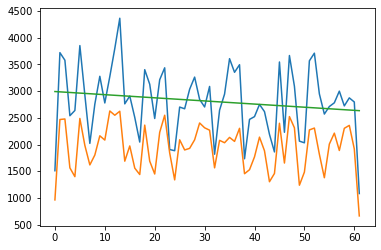

In [74]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def grafico(df):
    df.reset_index(inplace=True)
    x = df.index.values.reshape(-1, 1)
    y1 = df['price'].to_numpy().reshape(-1, 1)
    y2 = df['duration'].to_numpy().reshape(-1,1)
    reg = LinearRegression().fit(x, y1)
    x_ = np.array([x.min(), x.max()]).reshape(-1, 1)
    y_ = reg.predict(x_)

    fig = plt.figure()
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x_,y_)
    plt.show()

df = pd.read_sql("""SELECT title, price, duration, date(date_time) AS date FROM
                (user_booking AS b INNER JOIN user_service AS s ON b.service_id = s.id)
                WHERE paid_out = 1;""", con=connection)
grafico(df[['price', 'duration', 'date']].groupby('date').agg(np.sum))

In [50]:
def special_agg(series):
    return list(series)


cursor.execute("""SELECT title, duration, paid_out, date_time FROM
(user_booking AS b INNER JOIN user_service AS s ON b.service_id = s.id)
WHERE date_time < date("now", "+6 days") AND date_time > date("now", "-1 day")
AND business_id = 4;""")
df = pd.DataFrame(cursor.fetchall()).rename(columns={0: 'title', 1: 'duration', 2: 'paid_out', 3: 'date_time'})
df['date_time'] = df['date_time'].map(lambda x: datetime.datetime.fromisoformat(x))
df['date'] = df['date_time'].map(lambda x: x.date())
df.groupby(by='date').agg(special_agg)

,title,duration,paid_out,date_time
date,,,,
2021-12-03,"[Nutrição, Nutrição, Nutrição, Nutrição]","[35, 35, 35, 35]","[0, 1, 0, 0]","[2021-12-03 15:51:00, 2021-12-03 12:16:00, 202..."
2021-12-04,"[Nutrição, Nutrição, Chapinha, Chapinha]","[35, 35, 30, 30]","[0, 1, 1, 0]","[2021-12-04 01:25:00, 2021-12-04 03:13:00, 202..."
2021-12-05,"[Nutrição, Chapinha, Chapinha]","[35, 30, 30]","[1, 0, 0]","[2021-12-05 01:58:00, 2021-12-05 06:57:00, 202..."
2021-12-06,"[Nutrição, Nutrição, Chapinha]","[35, 35, 30]","[0, 1, 0]","[2021-12-06 19:40:00, 2021-12-06 20:36:00, 202..."
2021-12-07,"[Nutrição, Nutrição, Nutrição]","[35, 35, 35]","[0, 1, 0]","[2021-12-07 14:28:00, 2021-12-07 01:00:00, 202..."
2021-12-08,"[Nutrição, Chapinha, Chapinha, Chapinha]","[35, 30, 30, 30]","[1, 1, 1, 0]","[2021-12-08 14:48:00, 2021-12-08 05:31:00, 202..."
2021-12-09,[Chapinha],[30],[1],[2021-12-09 16:14:00]


In [ ]:
cursor.execute("""SELECT date_time, 
                    GROUP_CONCAT(CASE WHEN "group" == 'A' THEN role END) as A,
                    GROUP_CONCAT(CASE WHEN "group" == 'B' THEN role END) as B,
                    GROUP_CONCAT(CASE WHEN "group" == 'C' THEN role END) as C
                FROM SO52961250 t GROUP BY date(date_time);""")
for item in cursor.fetchall():
    print(item)

In [ ]:
cursor.execute(""" """)

In [29]:
cursor.execute('SELECT date_time FROM user_booking WHERE date_time < date("now", "+6 days") AND date_time > date("now", "-1 day");')
print(cursor.fetchall())

In [ ]:
cursor.execute('SELECT name FROM sqlite_master WHERE type="table";')
print(cursor.fetchall())

In [ ]:
cursor.execute('PRAGMA table_info([user_customuser]);')
print(cursor.fetchall())

In [ ]:
# Por motivos desconhecidos, o Django usa o nome errado e diz que a coluna não existe, então alteramos

cursor.execute('ALTER TABLE user_business_invitations RENAME COLUMN from_business_id TO business_id;')

In [ ]:
categories = [
    [1, 'Cortes'],
    [2, 'Tratamentos Capilares'],
    [3, 'Coloração'],
    [4, 'Penteados'],
    [5, 'Depilação'],
    [6, 'Manicure'], 
    [7, 'Consulta Medica'], 
    [8, 'Exames de Saude'],
    [9, 'Tatuagem e Piercing'],
    [10, 'Massagem']
]

In [35]:
fake = Faker('pt_BR')

ddd = [11,12,13,14,15,16,17,18,19,21,22,24,27,28,31,32,33,34,35,37,38,41,42,43,44,45,46,47,48,49,51,53,54,55,61,62,63,64,65,66,67,68,69,71,73,74,75,77,79,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99]
ddd = np.array(ddd, dtype=str)

def create_users(num=1):
    output = [{"password": make_password(fake.password()),
               "email": fake.unique.email(),
               "first_name": fake.first_name(),
               "last_name": fake.last_name(),
               "is_active": True,
               "is_admin": False,
               "last_login": fake.date_time_between(start_date='-1M', end_date='now'),
               "business_id": random.randint(1,205)
            } for x in range(num)]
    n = int(num/2)
    phone = np.array([random.randint(900000000, 999999999) for x in range(n)], dtype=str)
    result = pd.DataFrame(output)
    result['cpf'] = np.append(np.array(random.sample(range(10000000000, 20000000000), n)), np.array([None]*n))
    result['phone_number'] = np.append(np.array([None]*n), list(map(lambda x: random.choice(ddd)+x, phone)))
    result['birth_date'] = np.append([fake.date_between(start_date='-70y', end_date='-18y') for x in range(n)], np.array([None]*n))
    result['is_client'] = np.append(np.array([False]*n), np.array([True]*n))
    return result

user = create_users(2000)
user.head()

,password,email,first_name,last_name,is_active,is_admin,last_login,business_id,cpf,phone_number,birth_date,is_client
0,pbkdf2_sha256$260000$C62IGT4TJORLDtCDI74o5C$Hy...,maria-luiza86@example.com,Kevin,da Mota,True,False,2021-11-15 01:06:34,59,11616617223,None,1959-05-29,False
1,pbkdf2_sha256$260000$mOkOAd0WD2zRvWd9owMCJM$X0...,ramosdavi-lucas@example.org,Eduarda,Fernandes,True,False,2021-12-02 08:59:35,178,17243545956,None,1981-04-07,False
2,pbkdf2_sha256$260000$MxZE4kfcYZ7Lm0DshX5KQs$6/...,gdas-neves@example.org,Luna,Teixeira,True,False,2021-11-10 03:18:13,78,19755012255,None,1972-07-24,False
3,pbkdf2_sha256$260000$HT9Pf2TUIlxUdxO9GenV4f$fI...,fogacajoaquim@example.net,Arthur,Costela,True,False,2021-11-18 12:04:22,74,17365075031,None,1972-07-11,False
4,pbkdf2_sha256$260000$GFahZ2HKAYFerF7dbkEEKh$8/...,ydias@example.org,Enzo Gabriel,Cunha,True,False,2021-11-14 08:01:18,78,19707802572,None,1955-02-21,False


In [39]:
def create_business(num=1):
    output = [{"name": fake.unique.company(),
               "register_date": fake.date_between(start_date='-1M', end_date='now'),
            } for x in range(num)]
    result = pd.DataFrame(output)
    result['cnpj_cpf'] = random.sample(range(10000000000, 20000000000), num)
    result['ceo_id'] = random.sample(range(11,2011), num)
    return result

business = create_business(200)

In [193]:
service = [
    ['Corte Masculino Tesoura', 1],
    ['Corte Masculino Máquina', 1],
    ['Corte Feminino Longo', 1],
    ['Corte Feminino Curto', 2],
    ['Hidratação', 2],
    ['Nutrição', 2],
    ['Descolorir Full', 3],
    ['Descolorir Mechas', 3],
    ['Coloração Full', 3],
    ['Coloração Mechas', 3],
    ['Chapinha', 4],
    ['Prancha', 4],
    ['Progressiva', 4],
    ['Escova', 4],
    ['Depilação íntima', 5],
    ['Depilação Abdômen', 5],
    ['Depilação Pernas', 5],
    ['Depilação Full', 5],
    ['Depilação Laser', 5],
    ['Manicure', 6],
    ['Cutícula', 6],
    ['Pedicure', 6],
    ['Avaliação Dentista', 7],
    ['Revisão Dentista', 7],
    ['Limpeza Dental', 7],
    ['Cirurgia', 7],
    ['Terapia', 7],
    ['Analise', 7],
    ['Exame de Sangue', 8],
    ['Tomografia', 8],
    ['Raio X', 8],
    ['Ultrassom', 8],
    ['Eletrocardiograma', 8],
    ['Tatuagem pequena', 9],
    ['Tatuagem média', 9],
    ['Tatuagem grande', 9],
    ['Piercing', 9],
    ['Piercing íntimo', 9],
    ['Massagem', 10],
    ['Quiropraxia', 10],
    ['Acupuntura', 10],
]

service = pd.DataFrame(service).rename(columns={0: 'title', 1: 'category_id'})

In [ ]:
def create_services(num=1):
    minutes = [5*x for x in range(2,21)]
    output = [{"description": fake.paragraph(),
               "duration": random.choice(minutes),
               "price": random.randint(10, 150),
               "business_id": random.randint(1, 205),
                } for x in range(num)]
    return pd.DataFrame(output)

service_partial = create_services(41)
service = service_partial.join(service)

In [ ]:
def create_booking(num=1):
    output = [{ "date_time": fake.date_time_between(start_date='-1M', end_date='+1M').replace(second=0),
                "paid_out": fake.boolean(),
                "comment": fake.paragraph(),
                "client_id": random.randint(1011, 2011),
                "service_id": random.randint(1, 41),} for x in range(num)]
    return pd.DataFrame(output)

booking = create_booking(4000)

In [ ]:
to_sql = [(user, 'user_customuser'), (business, 'user_business'), (service, 'user_service'),
        (categories, 'user_servicecategory'), (booking, 'user_booking')]

engine = create_engine('sqlite:///db.sqlite3')
for tupla in to_sql:
    tupla[0].to_sql(name = tupla[1], con = engine, if_exists = 'append', index = False)

In [41]:
engine = create_engine('sqlite:///db.sqlite3')
business.to_sql(name = 'user_business', con = engine, if_exists = 'append', index = False)

In [51]:
connection.commit()
cursor.close()
connection.close()